# Desafio - Recomendação de Produtos

## Case baseado no desafio do Kaggle: "Instacart Market Basket Analysis"

Esse desafio é baseado em uma competição do Kaggle ([https://www.kaggle.com](https://www.kaggle.com)) de 2017, onde é pedido para fazer a predição de se um produto será comprado por dado usuário no carrinho atual, baseado em suas compras anteriores.

Não está no escopo da aula 



Link para o desafio: [https://www.kaggle.com/c/instacart-market-basket-analysis](https://www.kaggle.com/c/instacart-market-basket-analysis)

## Origem dos Dados:

Os dados mostrados nesse desafio são uma amostra extraída do dataset disponibilizado gratuitamente pela empresa Instacart ([https://www.instacart.com/](https://www.instacart.com/)) **\***. São dados reais do banco de dados da empresa, que foram anonimizados para o uso por pesquisadores e em competições de Data Science.

 
###### * “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from [https://www.instacart.com/datasets/grocery-shopping-2017](https://www.instacart.com/datasets/grocery-shopping-2017) on March 10, 2017.

___

# Imports

In [59]:
import numpy as np
import os
import pandas as pd

In [60]:
""" habilitando plots no notebook """
%matplotlib inline

In [61]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
""" Configurando o Matplotlib para o modo manual 
    Rodrigo Edit: Desta forma os gráficos só serão exibidos com comando plt.show()"""
plt.interactive(False)

# Objetivo :

Analisar o dataset (o mesmo construído na Aula 09) e responder às questões em cada item usando gráficos.

# Importante:

Todos os gráficos devem conter:
* Título
* Rótulos do Eixo X e do Eixo Y

Se mais de um gráfico for plotado em uma única janela, eles devem ter:
* Cores diferentes
* Legenda
* Transparência (na sobreposição)

# Dataset:

O dataset utilizado nesse desafio é um sub-conjunto daquele construído na Aula 9. Para essa aula, será necessário carregar apenas duas colunas: `user_id` e `product_name`.

## Carregando os dados

In [63]:
""" Nota sobre o Warning: 
    O código abaixo levanta um Warning gerado por uma chamada interna do pandas conflitando com o Numpy.
    Não há necessidade de tratar esse Warning no momento, o comportamento do 'read_csv' é funcional para o que queremos.
"""
dataset = pd.read_csv(
    os.path.join("data", "dataset.csv"),
    usecols=["user_id", "product_name"],
    sep=",",
    index_col=0,
    encoding="utf-8"
)

/home/rodrigo/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Extração dos dados específicos

In [64]:
product_count = dataset.groupby("user_id").product_name.count()

In [65]:
product_count.describe()

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: product_name, dtype: float64

In [66]:
product_count.head(10)

user_id
1     11
2     31
5      9
7      9
8     18
9     22
10     4
13     5
14    11
17     6
Name: product_name, dtype: int64

# Parte 1: Distribuição de Produtos por Usuário

## A) Visualização da Distribuição Original

Avalie a distribuição de dados do `Número de Produtos` por `Usuário`, respondendo a cada item. 

### A.1) Visualização

Construa uma visualização composta que mostre a distribuição de dados e os outliers.

Depois, responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

In [75]:
sns.set() # turn on seaborn style

In [77]:
sns.reset_orig() # turn off seaborn style

In [143]:
def plot_hist_box(df):
    f, axes = plt.subplots(
        2, # horizontal dimension
        1, # vertical dimension
        figsize=(15,8), # size of all figure 
        sharex=False, # share axes x, can be used on axes y
        gridspec_kw = {'height_ratios': [3, 1]} # Size of a figure
    )
    
    """
    f: the figure object, can be used to config all the image,
    axes: the 
    """
    df.plot(kind='hist', bins=20, ax=axes[0])
    df.plot(kind='box', ax=axes[1], vert=False,showfliers=True)

    plt.grid = True

    axes[0].set(title='Distribuição: Produtos por usuário')
    axes[0].set(ylabel='Contagem de Produtos')
    axes[0].set(xlabel='Número de usuários')
    axes[0].grid(True)
    axes[1].grid(True)
    
    plt.show()
    return f, axes

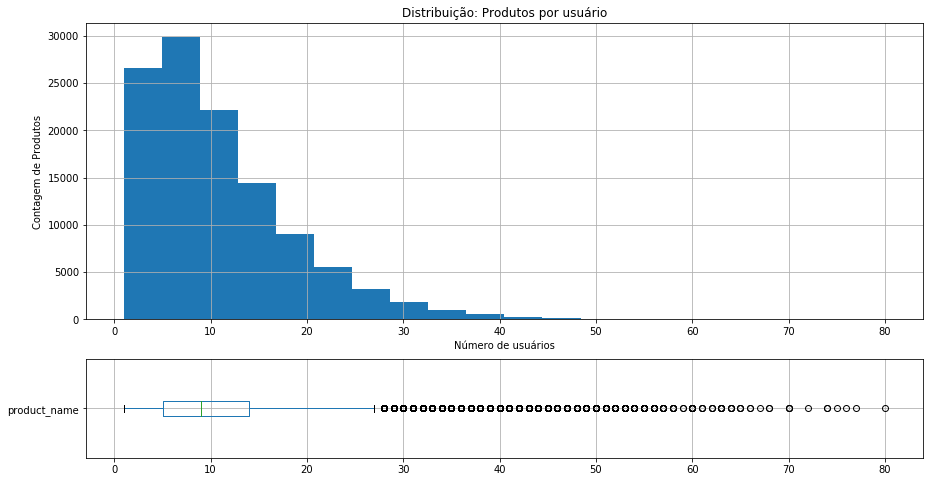

(<matplotlib.figure.Figure at 0x7f59c3d01978>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f59c40aa208>,
       dtype=object))

In [144]:
plot_hist_box(product_count)

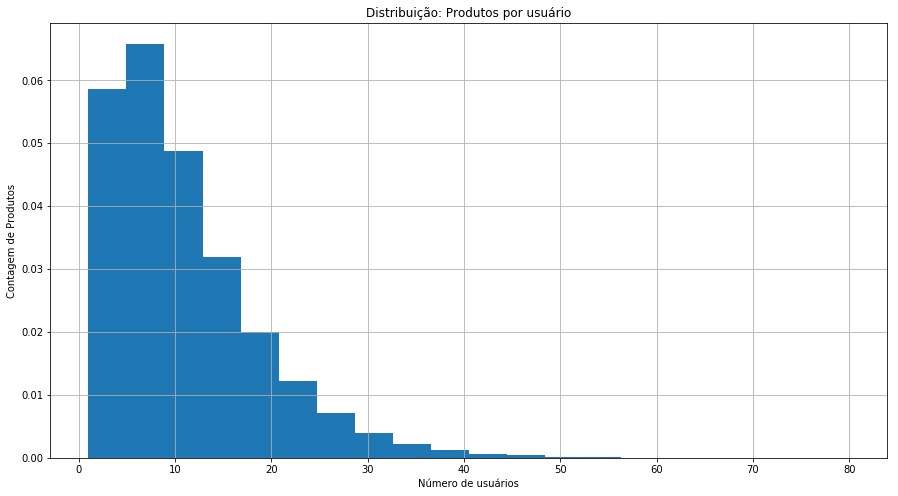

In [145]:
product_count.hist(
    bins=20,
    figsize=(15,8), 
    normed=True # o eixo x fica em porcentagem
)
plt.title('Distribuição: Produtos por usuário')
plt.ylabel('Contagem de Produtos')
plt.xlabel('Número de usuários')
plt.grid = True
plt.show()

### A.2) Cortes

Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. 

Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

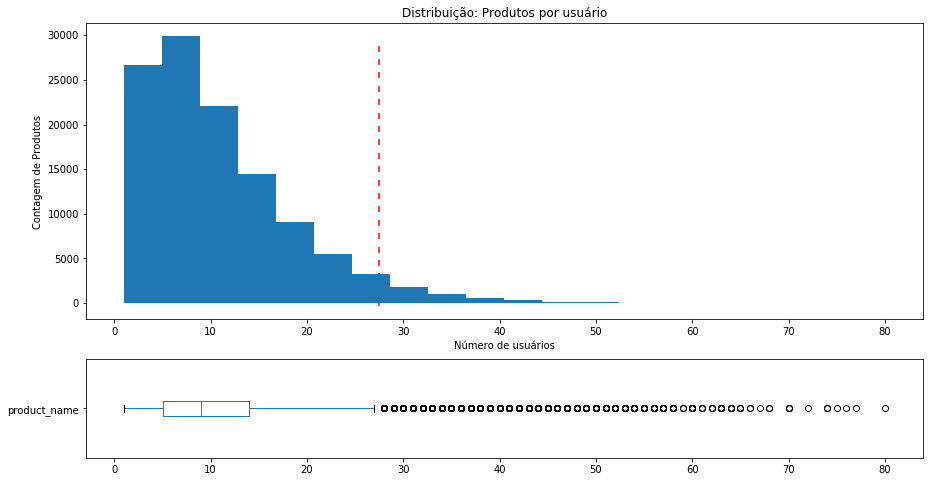

In [146]:
y = np.arange(0,30000,1500)
x = [27.5 for i in y]

f, axes = plt.subplots(
    2, # horizontal dimension
    1, # vertical dimension
    figsize=(15,8), # size of all figure 
    sharex=False, # share axes x, can be used on axes y
    gridspec_kw = {'height_ratios': [3, 1]} # Size of a figure
)

"""
f: the figure object, can be used to config all the image,
axes: the 
"""
product_count.plot(kind='hist', bins=20, ax=axes[0])
product_count.plot(kind='box', ax=axes[1], vert=False,showfliers=True)

plt.grid = True

axes[0].set(title='Distribuição: Produtos por usuário')
axes[0].set(ylabel='Contagem de Produtos')
axes[0].set(xlabel='Número de usuários')

""" Using scatter https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
:marker: style of points https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
"""
axes[0].scatter(x, y,marker='|', c='red')
axes[1].scatter(x, y, marker='|', c='red')

plt.show()

### A.3) Nova Distribuição

Elimine os outliers e construa outro plot da nova distribuição.

In [147]:
desc = product_count.describe()
# Check this formula on web for the cut of outliers
cut_point = 1.5 * (desc['75%'] - desc['25%']) + desc['75%']
cut_point

27.5

In [152]:
product_count_no_outliers = product_count[product_count < cut_point]

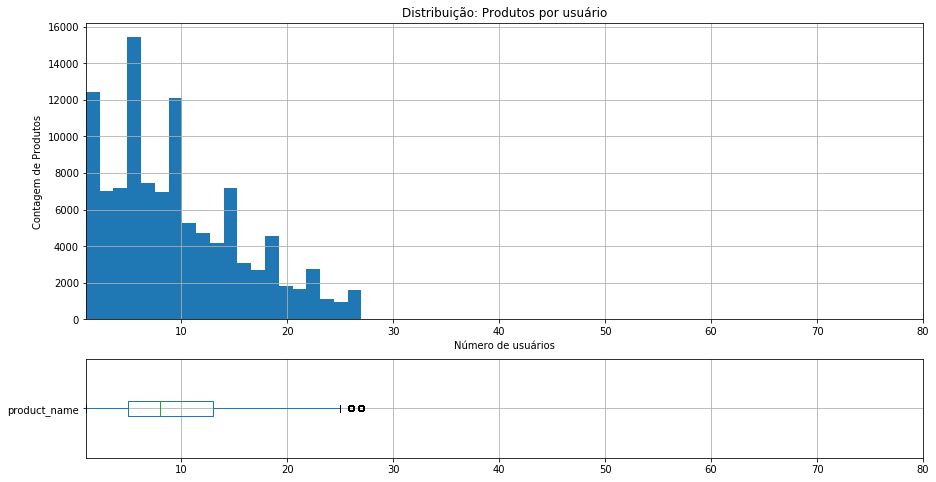

In [158]:
f, axes = plt.subplots(
    2, # horizontal dimension
    1, # vertical dimension
    figsize=(15,8), # size of all figure 
    sharex=False, # share axes x, can be used on axes y
    gridspec_kw = {'height_ratios': [3, 1]} # Size of a figure
)

"""
f: the figure object, can be used to config all the image,
axes: the 
"""
product_count_no_outliers.plot(kind='hist', bins=20, ax=axes[0])
product_count_no_outliers.plot(kind='box', ax=axes[1], vert=False,showfliers=True)

product_count_no_outliers.grid = True

axes[0].set(title='Distribuição: Produtos por usuário')
axes[0].set(ylabel='Contagem de Produtos')
axes[0].set(xlabel='Número de usuários')
axes[0].grid(True)
axes[1].grid(True)
axes[0].set(xlim = (1,80))
axes[1].set(xlim = (1,80))

plt.show()

## B) Visualização da Distribuição Transformada

Uma técnica que é muito usada para compreender melhor dados de uma distribuição como essa é  a aplicação do `logaritmo` aos dados originais. Para saber mais sobre essa função matemática, consulte [esta referência](https://pt.wikibooks.org/wiki/Matem%C3%A1tica_elementar/Logaritmos).

Aplique o `logaritmo de base 10` à massa de dados e responda aos itens:

B.1) Construa uma visualização composta que mostre a distribuição de dados e os outliers.

B.2) Responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

B.3) Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

B.4) Elimine os outliers e construa outro plot da nova distribuição.

### Transformação dos dados

In [ ]:
product_count_log = product_count.map(np.log10)

In [ ]:
product_count_log.describe()

In [ ]:
product_count_log.head()

### B.1) Visualização

Construa uma visualização composta que mostre a distribuição de dados e os outliers.

Depois, responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

In [ ]:
""" Escreva a a Solução Aqui """    

### B.2) Cortes

Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. 

Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

In [ ]:
""" Escreva a a Solução Aqui """    

### B.3) Nova Distribuição

Elimine os outliers e construa outro plot da nova distribuição.

In [ ]:
""" Escreva a a Solução Aqui """    

# Parte 2: Recomendação Simples de Produtos

Um sistema de recomendação bem rudimentar pode ser construído usando a teoria de [`Collaborative Filtering`](https://en.wikipedia.org/wiki/Collaborative_filtering). 

Na figura abaixo está mostrado um exemplo simples:

![Collaborative Filtering](images/Collaborative_filtering.gif)

A idéia principal é representar um `usuário` pelo seu `perfil de compras`, ou seja, o usuário será representado por **todos os produtos** que ele já comprou.

## Construção do Dataset

Como serão usados métodos computacionais muito pesados, será necessário reduzir bastante a quantidade de dados utilizados. Dessa forma, serão usados apenas os **1% dos dados de usuários que compraram mais produtos** do dataset.

### Selecionando os usuários

In [159]:
product_count.describe(percentiles=[.1, .25, .5, .75, .99])

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
10%           2.000000
25%           5.000000
50%           9.000000
75%          14.000000
99%          37.000000
max          80.000000
Name: product_name, dtype: float64

In [160]:
selected = product_count[product_count >= 37].index
selected.shape

(1194,)

In [161]:
dataset.loc[selected].shape

(51439, 1)

In [162]:
dataset.loc[selected].head()

,product_name
user_id,
238,Lunchables Turkey & American Cheese with Crackers
238,Light Red Raspberry Yogurt
238,Farmhouse Hearty White Bread
238,Lunchables Turkey & American Cheese Cracker St...
238,Strawberry Banana


### Criando a Tabela de Ocorrências

Uma `Tabela de Ocorrências` relaciona quantos produtos um usuário comprou **para cada produto**. 

Exemplo:

a) Dado Original:

| user_id | product_name  |
|:------- |:------------- |
| 12345   | Ground Coffee |
| 12345   | White Sugar   |
| 12345   | Bread         |
| 67890   | Ground Coffee |
| 67890   | A Type Milk   |
| 67890   | Vodka         |
| 67890   | Fudge Brownie |

b) Tabela de Ocorrências:

| user_id | Ground Coffee | White Sugar   | Bread         | A Type Milk   | Vodka         | Fudge Brownie |
|:------- |:------------- |:------------- |:------------- |:------------- |:------------- |:------------- |
| 12345   | 1             | 1             | 1             | 0             | 0             | 0             |
| 67890   | 1             | 0             | 0             | 1             | 1             | 1             |




In [163]:
temp = dataset.loc[selected].reset_index()
users = temp.user_id
prods = temp.product_name

In [164]:
user_prod = pd.crosstab(users, prods)
user_prod.head(10)

product_name,& Go! Hazelnut Spread + Pretzel Sticks,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,0% Fat Vanilla Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,...,from Concentrate Mango Nectar,gelato Coffee Toffee,in 100% Juice Mixed Fruit,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders
user_id,,,,,,,,,,,,,,,,,,,,,
238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Redução de Dimensionalidade

A `Tabela de Ocorrências` é uma matriz muito grande e muito **esparsa**, i.e. possui muitas colunas e pouca informação. Por pouca informação pode-se entender que menos de 1% da matriz é composta por elementos **não zeros**.

Para esse tipo de dado, em que é necessária muita memória e processamento para se extrair informações relevantes, usam-se técnicas de **redução de dimensionalidade**. Essas técnicas têm como objetivo condensar (ou mesmo comprimir) a informação esparsa em uma representação muito menor e densa.

Nesse desafio será utilizado a técnica linear de extração de componentes principais, ou `Principal Component Analysis` (`PCA`). Para saber mais sobre essa ferramenta, veja os links abaixo:

- [Teoria do PCA (Wikipédia)](https://en.wikipedia.org/wiki/Principal_component_analysis)
- [Implementação do Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

A figura abaixo mostra um exemplo de PCA aplicado a um conjunto de dados de 2 variáveis (`x` e `y`). Pode-se observar que os novos eixos encontrados descrevem muito mais facilmente a distribuição de dados do que os eixos de `x` e `y` originais.

![GaussianScatterPCA](images/GaussianScatterPCA.svg)


Sem entrar muito em detalhes técnicos de implementação do PCA, essa técnica descorrelaciona (torna **linearmente independentes**) os dados originais e os ordena do mais importante (i.e. aquele que carrega **mais informação**) para o menos; com isso, pode-se escolher manter apenas as nosvas dimensões que **melhor explicam** os dados e jogar fora o resto. 

Nesse desafio, vamos reduzir a tabela de dados das `12.962` colunass originais para apenas `100` usando a implementação de PCA do `scikit-learn`. 

## ***check Gaussian function

In [169]:
from sklearn.decomposition import PCA

user_prod_pca = pd.DataFrame(
    index=user_prod.index,
    data=PCA(100).fit_transform(user_prod)
)
user_prod_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
238,-0.976656,-0.564290,-0.190333,0.136481,-0.043279,-0.137769,-0.197093,-0.070130,-0.234599,0.104567,...,0.030521,-0.142877,1.042449,0.078580,-0.165514,0.705383,0.142784,-0.036702,0.563869,0.162847
375,-0.127334,-0.063303,0.092121,0.727047,-1.127536,-0.314809,0.005708,-0.334816,-0.609405,0.287150,...,-0.123939,0.227195,-0.085783,0.230316,0.057254,-0.263788,0.437698,-0.072072,-0.003661,-0.023356
863,1.093155,-0.430330,-0.195173,0.505980,-1.103648,0.436894,-0.517195,0.882653,-0.665171,-0.350001,...,-0.255116,-0.027122,0.134976,0.494569,-0.328679,0.232125,-0.032748,-0.052065,0.261069,0.077072
890,0.863729,-0.164227,-0.143004,0.383661,0.202262,-0.539420,-0.421872,-0.291896,0.473045,0.302549,...,0.118336,-0.152906,-0.080876,-0.005918,0.111692,0.427931,0.165030,-0.042594,0.004019,-0.003731
982,-0.166054,0.229982,0.808873,0.127143,-0.530902,-0.488632,0.069797,0.187273,0.346284,-0.042587,...,-0.779128,-0.299767,0.131796,-0.223005,-0.281174,0.137663,0.030107,0.270406,0.091465,0.135014


Para toda a Parte 2 do desafio, será usada a tabela gerada por PCA `user_prod_pca`. 

## A) Visualização e Seleção dos Usuários

Como o PCA ordena as _features_ da mais importante para a menos importante, as duas primeiras colunas da tabela `user_prod_pca` podem ser usadas para visualização dos usuários do sistema. 

Como temos muitos usuários ainda (`1.194`), será necessário escolher alguns poucos para observar a `similaridade` entre eles.   



### A.1) Visualização

Crie um `scatter plot` que mostra a representação 2D de todos os usuários em `user_prod_pca` usando as colunas `0` para  o eixo `x` e a coluna `1` para o eixo `y`. 

Esse gráfico deve ter as seguintes características:
* Tamanho da Figura: 15 x 15
* Título e Rótulos para os eixos X e Y
* Tamanho do símbolo no mínimo igual a 60
* Transparência, para verificar dados que eventualmente se sobreponham.

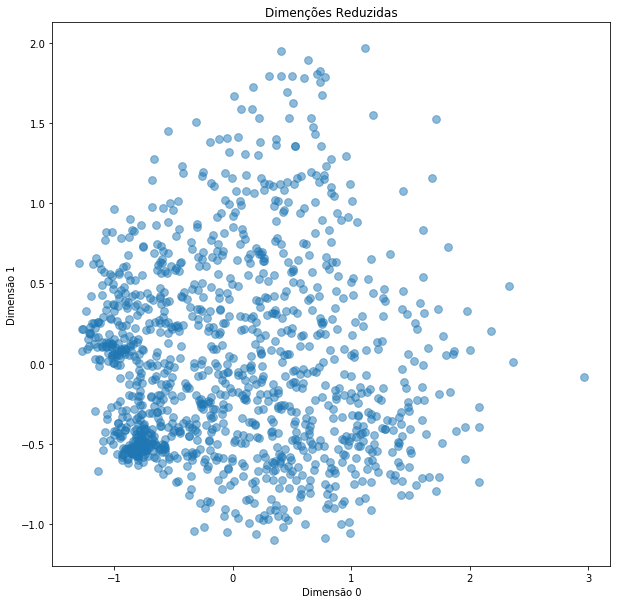

In [171]:
user_prod_pca.plot(
    kind='scatter', 
    x=0, y=1,
    s=60, 
    alpha=0.5,
    ax=plt.gca(),
    figsize=(10,10)
)
plt.xlabel('Dimensão 0')
plt.ylabel('Dimensão 1')
plt.title('Dimenções Reduzidas')
plt.show()

### A.2) Seleção

Crie outro `scatter plot` que mostra apenas uma parte do domínio onde há uma maior concentração de usuários; esse gráfico será parecido com um **zoom** nessa parte do domínio. 

Sugestão do corte:
- `-0.7 < X < -0.5`
- `-0.6 < Y < -0.4`

Esse gráfico deve ter as mesmas características do anterior e ainda mostrar, para cada usuário, o texto contendo seu `user_id`.

Shape:  (30, 100)


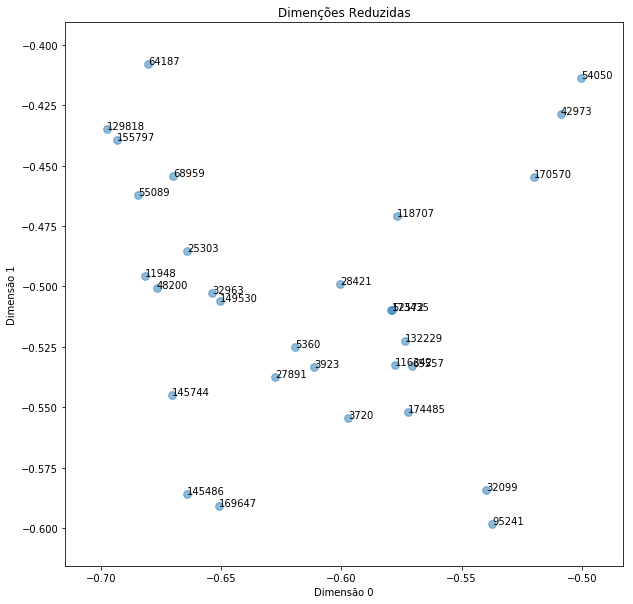

In [178]:
index = (user_prod_pca.loc[:,0] >= -0.7) & \
        (user_prod_pca.loc[:,0] < -0.5) & \
        (user_prod_pca.loc[:,1] >= -0.6) & \
        (user_prod_pca.loc[:,1] < -0.4)
    
print("Shape: ", user_prod_pca[index].shape)
selected_users = user_prod_pca[index]

selected_users.plot(
    kind='scatter', 
    x=0, y=1,
    s=60, 
    alpha=0.5,
    ax=plt.gca(),
    figsize=(10,10)
)

for label, x, y in selected_users.reset_index().values[:,:3]:
    plt.text(x=x,y=y,s=int(label))

plt.xlabel('Dimensão 0')
plt.ylabel('Dimensão 1')
plt.title('Dimenções Reduzidas')
plt.show()

## B) Similaridade usando Correlação entre Usuários

Para saber se um usuário é `similar` a outro, pode-se utilizar várias métricas de similaridade. Como o método de redução de dimensionalidade escolhido é linear, pode-se usar o `coeficiente de correlação de Pearson` entre as representações de dimensão `100` dos usuários como métrica de similaridade. Para saber mais sobre a correlação de Pearson, veja [este link da Wikipédia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

A interpretação do coeficiente `r` como métrica de similaridade é a seguinte:
* Se `|r|` é próximo de `1`, os elementos são **muito similares**;
* Se `|r|` é próximo de `0`, os elementos são **muito diferentes**.


### B.1) Visualização da Correlação

Selecione `10` usuários do `item A`, dentre próximos e distantes, e visualize a `correlação` entre todos eles.

Dica 1: use um método que mostre a correlação de todos contra todos em vez de criar uma visualização para cada dupla.

Dica 2: A maioria das funções de correlação enxergam os dados por coluna em vez de linhas; tente transpor a sua matriz caso o resultado esteja estranho. 

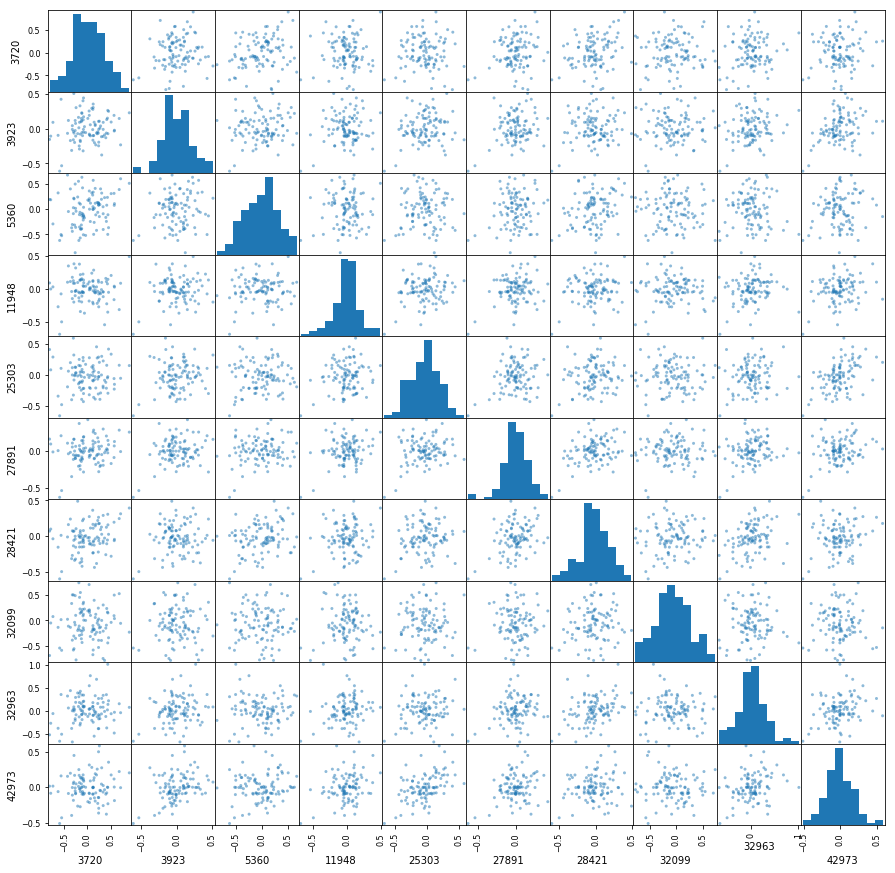

In [182]:
pd.plotting.scatter_matrix(selected_users.T.loc[:, :10], figsize=(15,15))
plt.show()

In [186]:
temp = selected_users.T.corr().stack().sort_values()
temp = temp[temp!=1]
temp

user_id  user_id
169647   170570    -0.075988
170570   169647    -0.075988
3720     95241     -0.073188
95241    3720      -0.073188
170570   65557     -0.069264
65557    170570    -0.069264
149530   32099     -0.059935
32099    149530    -0.059935
68959    32099     -0.056294
32099    68959     -0.056294
3923     95241     -0.054735
95241    3923      -0.054735
68959    54050     -0.053221
54050    68959     -0.053221
170570   32099     -0.046540
32099    170570    -0.046540
25303    169647    -0.039770
169647   25303     -0.039770
68959    5360      -0.039618
5360     68959     -0.039618
32099    5360      -0.035805
5360     32099     -0.035805
116342   55089     -0.034984
55089    116342    -0.034984
32099    118707    -0.032046
118707   32099     -0.032046
132229   145744    -0.031656
145744   132229    -0.031656
169647   64187     -0.025727
64187    169647    -0.025727
                      ...   
11948    55089      0.435007
55089    11948      0.435007
173435   65557      0.4368

### B.2) Verificando a Similaridade das Compras dos Usuários

Escolha dois usuários com uma correlação alta e verifique os produtos que ambos compraram. Faça o mesmo depois para usuários de correlação baixa.

In [ ]:
""" Escreva a a Solução Aqui """    

# Desafio Extra: Construindo um Histograma

O `histograma` é uma ferramenta bem poderosa, que mostra a distribuição dos dados usando uma contagem simples de `buckets`. Essa função já é dada pelas principais bibliotecas, mas o desafio agora é criar esse plot a partir das funções básicas do `matplotlib`.

## Agrupando os dados em `Buckets`

A primeira parte é a criação dos `buckets`. Isso é feito definindo quanto `buckets` serão utilizados e distribuindo os dados entre eles.

In [ ]:
""" Definição dos Buckets """
bins = 10  # definição da quantidade de buckets

limits = np.linspace(product_count.min(), product_count.max(), bins+1)
limits

In [ ]:
""" Agrupamento dos dados """
histogram = {}

for p, q in zip(limits[:-1], limits[1:]):
    label = (p + q) / 2
    histogram[label] = ((product_count >= p) & (product_count < q)).sum()

histogram = pd.Series(histogram)
histogram

## Construindo o Gráfico de Barras (`Bar Plot`)

O gráfico de barras não foi dado na Pré-Aula, mas é uma das ferramentas básicas para a construção de gráficos importantes para um cientista de dados. 

Use uma das duas referências abaixo para construir o `histograma` da distribuição de quantidade de produtos por usuário:

1. [Pandas (nível fácil)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)
2. [Matplotlib Puro (nível hard)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

Ambos os gráficos devem ter:
- Tamanho da Figura = 12 x 8
- Título
- Rótulos nos eixos X e Y
- As barras devem ter largura cheia, i.e. devem tocar as barras vizinhas.
- Todas as Barras devem ter a mesma cor

In [ ]:
""" Escreva a a Solução Aqui """    

## Comparando diferentes números de Buckets

Usando o método `hist` do `pandas`, plotar o histograma com `bins=20` **por cima da mesma figura construída anteriormente**. 

O gráfico composto deve ter as seguintes características:
- O gráfico original (`bins=10`) deve ser plotado primeiro, em **azul**;
- O gráfico gerado pelo médoto `hist` deve ser plotado por cima do original, em **vermelho**;
- Ambos os gráficos devem estar visíveis (usar **transparência**);
- Deve haver uma legenda identificando os dois gráficos.


In [ ]:
""" Escreva a a Solução Aqui """    